### Dog cat classifier 

In [1]:
import os 
import numpy as np 
import cv2    # opencv 
from PIL import Image

In [2]:
import cv2 

In [3]:
image_path = r"C:\Users\dalpa\upflair\19 june\image\dogs\dog_4.jpg"


In [4]:
cat_image = Image.open(image_path)

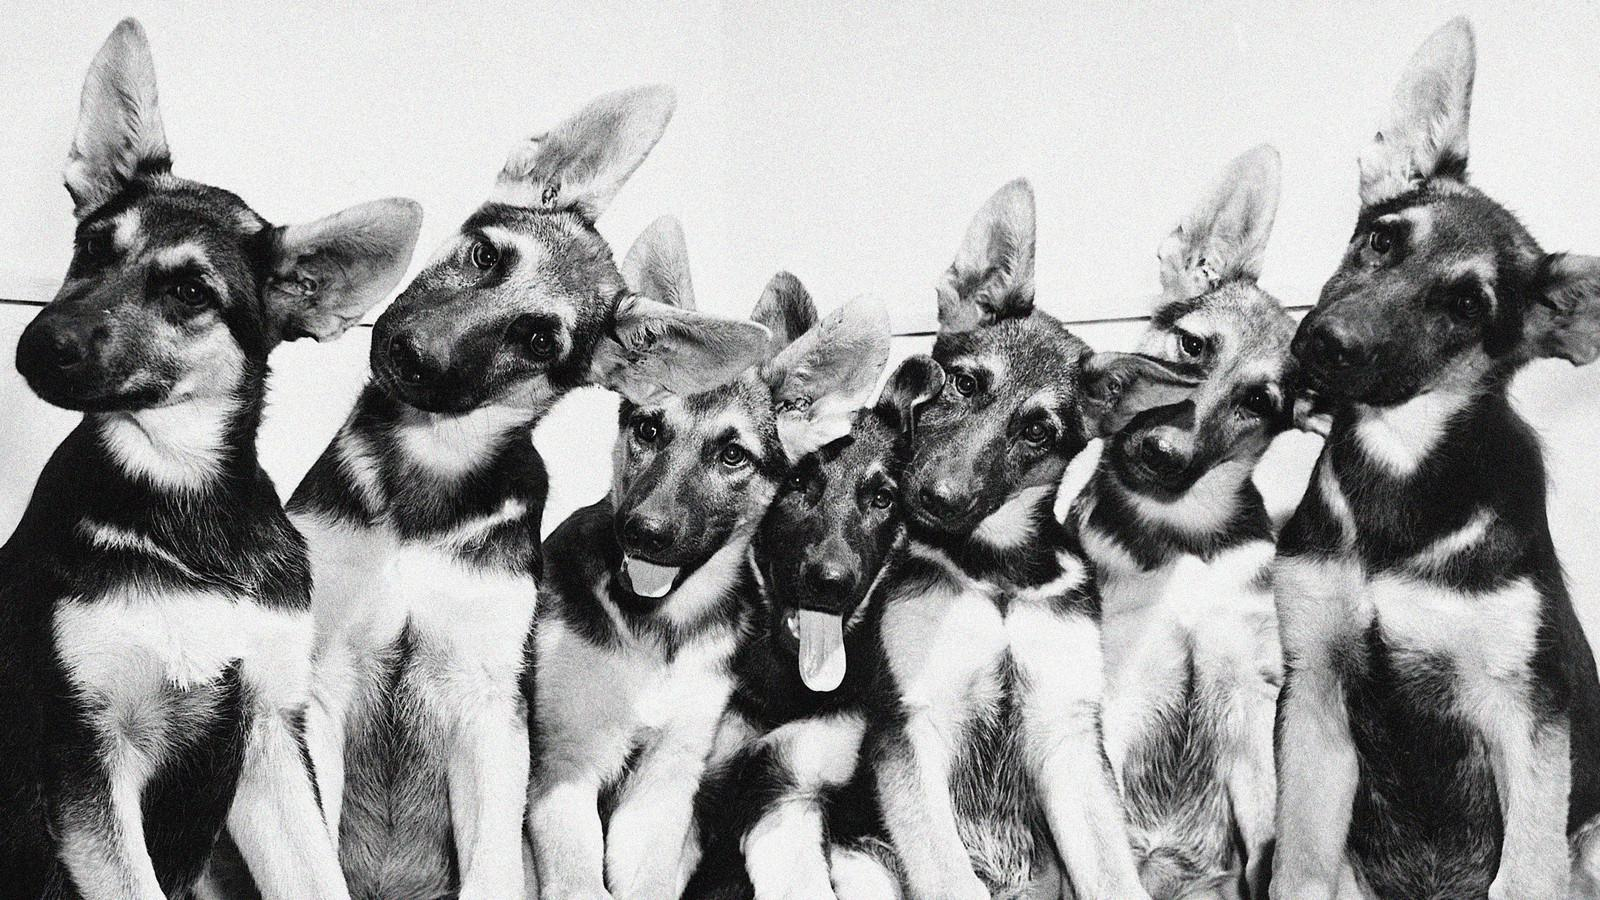

In [5]:
cat_image

In [6]:
cat_img_array = np.array(cat_image)
cat_img_array

array([[[241, 241, 241],
        [240, 240, 240],
        [236, 236, 236],
        ...,
        [235, 237, 236],
        [237, 239, 238],
        [237, 239, 238]],

       [[230, 230, 230],
        [233, 233, 233],
        [235, 235, 235],
        ...,
        [237, 239, 238],
        [238, 240, 239],
        [238, 240, 239]],

       [[231, 231, 231],
        [236, 236, 236],
        [237, 237, 237],
        ...,
        [233, 235, 234],
        [237, 239, 238],
        [240, 242, 241]],

       ...,

       [[ 14,  20,  18],
        [ 12,  18,  16],
        [ 12,  16,  15],
        ...,
        [164, 164, 166],
        [175, 173, 176],
        [166, 164, 167]],

       [[ 15,  21,  19],
        [ 13,  19,  17],
        [ 13,  17,  16],
        ...,
        [164, 164, 166],
        [164, 162, 165],
        [166, 164, 167]],

       [[ 16,  22,  20],
        [ 14,  20,  18],
        [ 13,  17,  16],
        ...,
        [159, 159, 161],
        [155, 153, 156],
        [170, 168, 171]]

In [7]:
path_dict = {'cats':[],'dogs':[]}
image_folder_path = r"C:\Users\dalpa\upflair\19 june\image"
for dir in os.listdir(image_folder_path):
    directory_path = os.path.join(image_folder_path,dir)
    for item in os.listdir(directory_path): 
        item_path = os.path.join(directory_path,item) 
        path_dict[dir].append(item_path)
print("we have successfully done our task!")

we have successfully done our task!


In [8]:
len(path_dict['dogs'])  # dogs images 

348

In [9]:
len(path_dict['cats'])  # cats images 


349

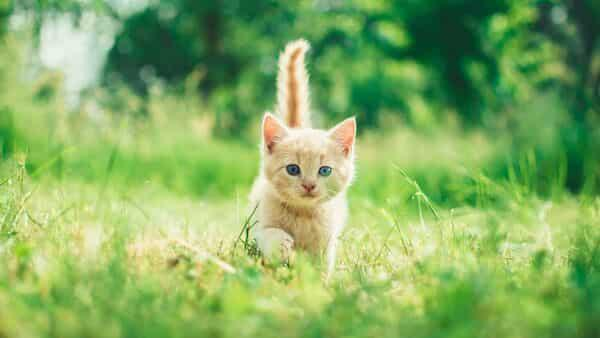

In [10]:
Image.open(path_dict['cats'][15])

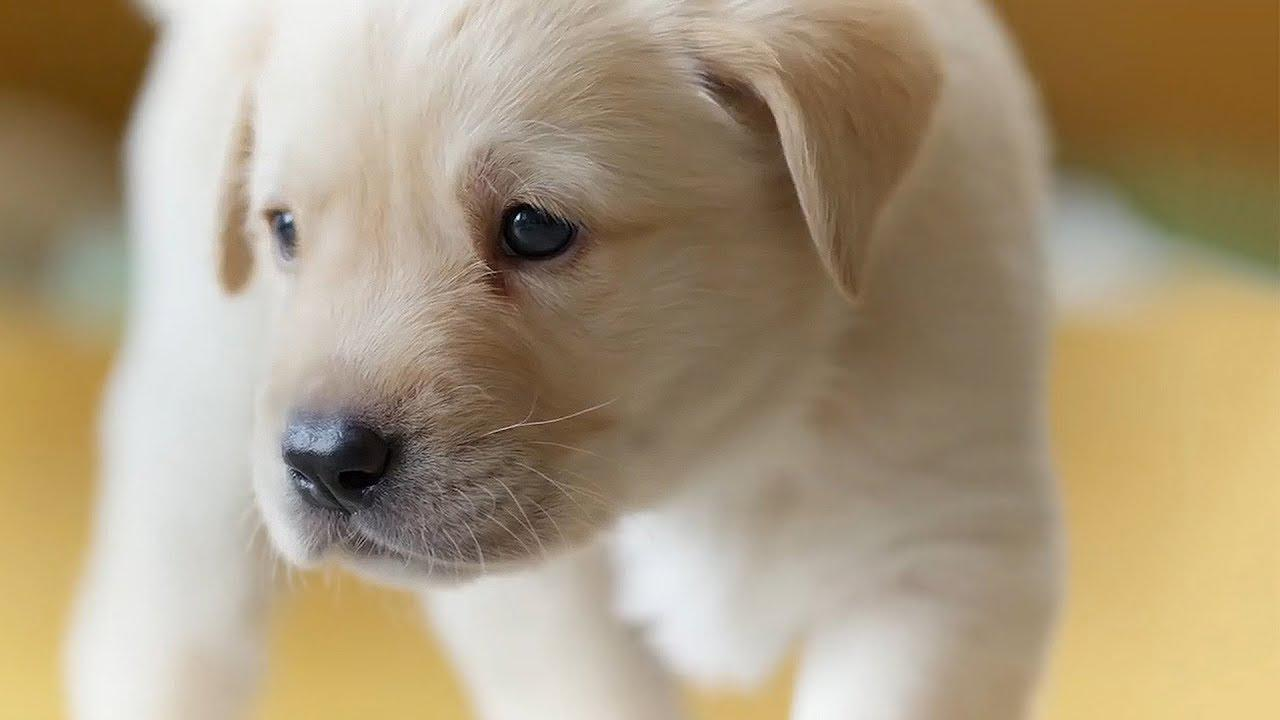

In [11]:
Image.open(path_dict['dogs'][45])

In [12]:
# images read with the help of path 

# Image.open() 
first_image = cv2.imread(path_dict['cats'][74])
first_image_resized = cv2.resize(first_image,(244,244))
first_image_resized.shape 

(244, 244, 3)

In [13]:
x = []
y = [] 

for key,value in path_dict.items():
    for path in value:
        image_loaded = cv2.imread(path)
        image_resized = cv2.resize(image_loaded,(244,244))
        x.append(image_resized) 
        y.append(key) 
        
    

In [14]:
x

[array([[[156, 142,  92],
         [159, 143, 101],
         [160, 145, 111],
         ...,
         [155, 143,  77],
         [157, 145,  81],
         [160, 148,  84]],
 
        [[151, 136,  87],
         [155, 140,  96],
         [158, 143, 107],
         ...,
         [152, 140,  76],
         [154, 142,  78],
         [157, 145,  81]],
 
        [[150, 136,  87],
         [154, 139,  94],
         [155, 140, 100],
         ...,
         [151, 139,  75],
         [153, 141,  77],
         [157, 145,  81]],
 
        ...,
 
        [[ 78,  87,  95],
         [ 76,  86,  93],
         [ 78,  87,  94],
         ...,
         [ 42,  46,  63],
         [ 44,  47,  62],
         [ 43,  47,  61]],
 
        [[ 49,  55,  55],
         [ 50,  56,  56],
         [ 47,  52,  53],
         ...,
         [ 39,  42,  57],
         [ 40,  43,  58],
         [ 43,  45,  61]],
 
        [[ 36,  40,  36],
         [ 33,  37,  33],
         [ 34,  37,  35],
         ...,
         [ 39,  42,  56],
  

In [15]:
y = [1 if clas =="dogs"  else 0 for clas in y ]

In [16]:
X = np.array(x)
Y = np.array(y)

In [17]:
X.shape ,Y.shape

((697, 244, 244, 3), (697,))

In [18]:
# import matplotlip.pyplot as plt
!pip install matplotlib

In [19]:
import matplotlib.pyplot as plt

In [20]:
# plt.scatter()
# plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test  =  train_test_split(X,Y,test_size=0.2,random_state=20)

In [23]:
# x_train = (x_train/255.0)
# x_test = (x_test/255.0)
# X_train.shape,x_test.shape

In [36]:
x_train = x_train/255.0
x_test = x_test/255.0
x_train.shape,x_test.shape

((557, 244, 244, 3), (140, 244, 244, 3))

In [47]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input ,decode_predictions
print("run")

run


In [48]:
model = ResNet50(weights='imagenet',input_shape=(224,224,3))

In [26]:
# model.summary()

In [39]:
for layer in model.layers:
  layer.trainable = False

In [28]:
# model.summary()

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [50]:
custome_model = Sequential([model,
layers.Flatten(),

layers.Dense(units=64,activation='relu'),
layers.Dense(units=48,activation='relu'),
layers.Dense(units=1,activation='sigmoid')])

custome_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
custome_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    25,636,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [42]:
img_path = r'C:\Users\dalpa\upflair\19 june\image\dogs\dog_4.jpg'
img = image.load_img(img_path,target_size=(224,224))
x = image.img_to_array(img)

In [43]:
x = np.expand_dims(x,axis=0)

In [44]:
x.shape

(1, 224, 224, 3)

In [45]:
history = custome_model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5


ValueError: Input 0 of layer "resnet50" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 244, 244, 3)

In [ ]:
x_train

array([[[[ 53,  54,  52],
         [ 45,  46,  44],
         [ 53,  54,  52],
         ...,
         [139, 139, 137],
         [134, 127, 127],
         [123, 110, 107]],

        [[ 56,  57,  55],
         [ 42,  43,  41],
         [ 50,  51,  49],
         ...,
         [134, 131, 132],
         [121, 118, 116],
         [117, 107, 102]],

        [[ 50,  51,  48],
         [ 53,  54,  52],
         [ 47,  48,  46],
         ...,
         [124, 119, 121],
         [120, 118, 113],
         [103,  95,  86]],

        ...,

        [[181, 192, 202],
         [187, 197, 207],
         [190, 198, 211],
         ...,
         [203, 212, 222],
         [190, 200, 210],
         [207, 217, 227]],

        [[193, 203, 211],
         [194, 204, 212],
         [190, 198, 211],
         ...,
         [197, 206, 216],
         [207, 217, 227],
         [201, 211, 221]],

        [[193, 202, 212],
         [191, 201, 210],
         [190, 199, 210],
         ...,
         [195, 205, 215],
        

In [ ]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,

In [ ]:
import random

In [ ]:
ls = ['A','B','C','D','e']
ls

['A', 'B', 'C', 'D', 'e']

In [ ]:
random.shuffle(ls)

In [ ]:
ls

['C', 'e', 'B', 'D', 'A']

In [ ]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,

In [ ]:
from sklearn.preprocessing import MinMaxScaler    # 0-1

In [ ]:
X_test = (x_test/255.0)
X_train = (x_test/255.0)

In [ ]:
X_test

array([[[[0.0627451 , 0.30980392, 0.23137255],
         [0.0627451 , 0.30980392, 0.23137255],
         [0.0627451 , 0.30980392, 0.23137255],
         ...,
         [1.        , 0.99607843, 1.        ],
         [1.        , 0.99607843, 1.        ],
         [1.        , 0.99607843, 1.        ]],

        [[0.05490196, 0.30196078, 0.22352941],
         [0.05490196, 0.30196078, 0.22352941],
         [0.05490196, 0.30588235, 0.22352941],
         ...,
         [1.        , 0.99607843, 1.        ],
         [1.        , 0.99607843, 1.        ],
         [1.        , 0.99607843, 1.        ]],

        [[0.05098039, 0.30196078, 0.22352941],
         [0.05098039, 0.30196078, 0.21960784],
         [0.04705882, 0.30196078, 0.21960784],
         ...,
         [1.        , 0.99607843, 1.        ],
         [1.        , 0.99607843, 1.        ],
         [1.        , 0.99607843, 1.        ]],

        ...,

        [[0.06666667, 0.09803922, 0.16470588],
         [0.07058824, 0.10196078, 0.16862745]

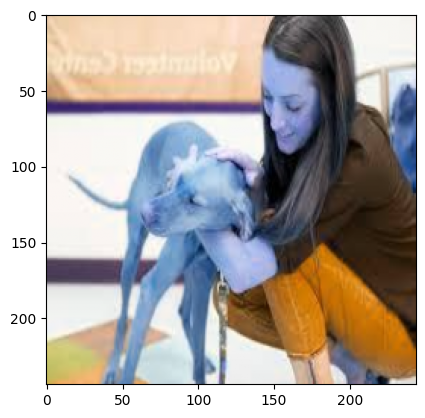

In [ ]:
plt.imshow(X_test[2])

In [ ]:
X_test.shape

(140, 244, 244, 3)

In [ ]:
x_train.shape

(557, 244, 244, 3)

In [ ]:
###  model traning  CNN  
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
print("run")


run


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D

In [ ]:
model = Sequential([
   layers.Conv2D(32,(3,3),activation='relu',input_shape=(244, 244, 3)),
   layers.MaxPooling2D((2,2)),
   
   layers.Conv2D(32,(3,3),activation='relu'),
   layers.MaxPooling2D((2,2)),
   
   layers.Conv2D(32,(3,3),activation='relu'),
   layers.Flatten(), 

# ann layers

   layers.Dense(units=64,activation='relu'),
   layers.Dense(units=30,activation='relu'),
   
   layers.Dense(units=1,activation='sigmoid')]
)



In [ ]:
model2 = Sequential([
   layers.Conv2D(32,(3,3),activation='relu',input_shape=(244, 244, 3)),
   layers.MaxPooling2D((2,2)),
   
   layers.Conv2D(16,(3,3),activation='relu'),
   
   
  
   layers.Flatten(), 

# ann layers

   
   layers.Dense(units=12,activation='relu'),
   
   layers.Dense(units=1,activation='sigmoid')]
)



In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 242, 242, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 121, 121, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 119, 119, 16)   │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 226576)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 12)             │     2,718,924 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,724,457 (10.39 MB)

 Trainable params: 2,724,457 (10.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 242, 242, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 121, 121, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 119, 119, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 57, 57, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 103968)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │     6,654,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 30)             │         1,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,675,389 (25.46 MB)

 Trainable params: 6,675,389 (25.46 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 449ms/step - accuracy: 0.4715 - loss: 167.9013 - val_accuracy: 0.5714 - val_loss: 0.6864
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 399ms/step - accuracy: 0.7022 - loss: 0.6175 - val_accuracy: 0.5929 - val_loss: 0.6771
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 396ms/step - accuracy: 0.9046 - loss: 0.3111 - val_accuracy: 0.5643 - val_loss: 1.0306
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 392ms/step - accuracy: 0.9754 - loss: 0.1110 - val_accuracy: 0.5929 - val_loss: 1.7983
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 396ms/step - accuracy: 0.9910 - loss: 0.0601 - val_accuracy: 0.5857 - val_loss: 1.7490


In [ ]:
#tran score high testing svore low
#data small
# model high arc.
# 

In [ ]:
history2 = model2.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 292ms/step - accuracy: 0.5021 - loss: 252.5994 - val_accuracy: 0.5000 - val_loss: 0.7230
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 282ms/step - accuracy: 0.5087 - loss: 0.7458 - val_accuracy: 0.5214 - val_loss: 0.6823
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 278ms/step - accuracy: 0.5594 - loss: 0.6360 - val_accuracy: 0.5214 - val_loss: 0.7209
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 277ms/step - accuracy: 0.5677 - loss: 0.7263 - val_accuracy: 0.5143 - val_loss: 0.6832
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 278ms/step - accuracy: 0.5622 - loss: 0.6551 - val_accuracy: 0.5143 - val_loss: 0.6832


In [ ]:
#data augmentation 